In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from time import time
from collections import Counter
import os
import pickle
import warnings
from time import time
import multiprocessing as mp
from multiprocessing import Pool
from joblib import Parallel, delayed
warnings.filterwarnings("ignore")

In [2]:
## finding all possible solutions for the independent model
def independent_model(n):
    ind=[] # Initialize an empty list to store valid solutions
     # Loop to generate n random coefficient sets
    for i in range(n):
        # Generate a random array of 5 numbers for 5 possible solutions of the model
        a=np.random.random(5)
         # Normalize the array so that the sum of its elements is 1
        a=a/sum(a)
        # Check if the roots of the polynomial with coefficients `a` are real
        # Polynomial coefficients are in the order [a0, -a1, a2, -a3, a4]
        if (np.isrealobj(np.roots([a[0],-a[1],a[2],-a[3],a[4]]))):
             # If the roots are real, append the coefficient set to the list
            ind.append(a)
    # Return the list of valid coefficient sets
    return ind
        
    

In [3]:
# Execute the independent_model function in parallel with 6 jobs
results = Parallel(n_jobs=6)(delayed(independent_model)(10**9) for _ in range(1))
# Convert the first result to a NumPy array
ind=np.array(results[0])

In [4]:
# Reading the table of Qi's for different experiments

# Non-flavopiridol experiment
MAR=pd.read_csv("March.csv") # Load March data into a DataFrame
SEP=pd.read_csv("September.csv")  # Load September data into a DataFrame
NOV=pd.read_csv("November.csv") # Load November data into a DataFrame

#Flavopiridol experiment
DEC=pd.read_csv("December.csv") # Load December data into a DataFrame
JAN=pd.read_csv("January.csv")  # Load January data into a DataFrame
AUG=pd.read_csv("August.csv") # Load August data into a DataFrame



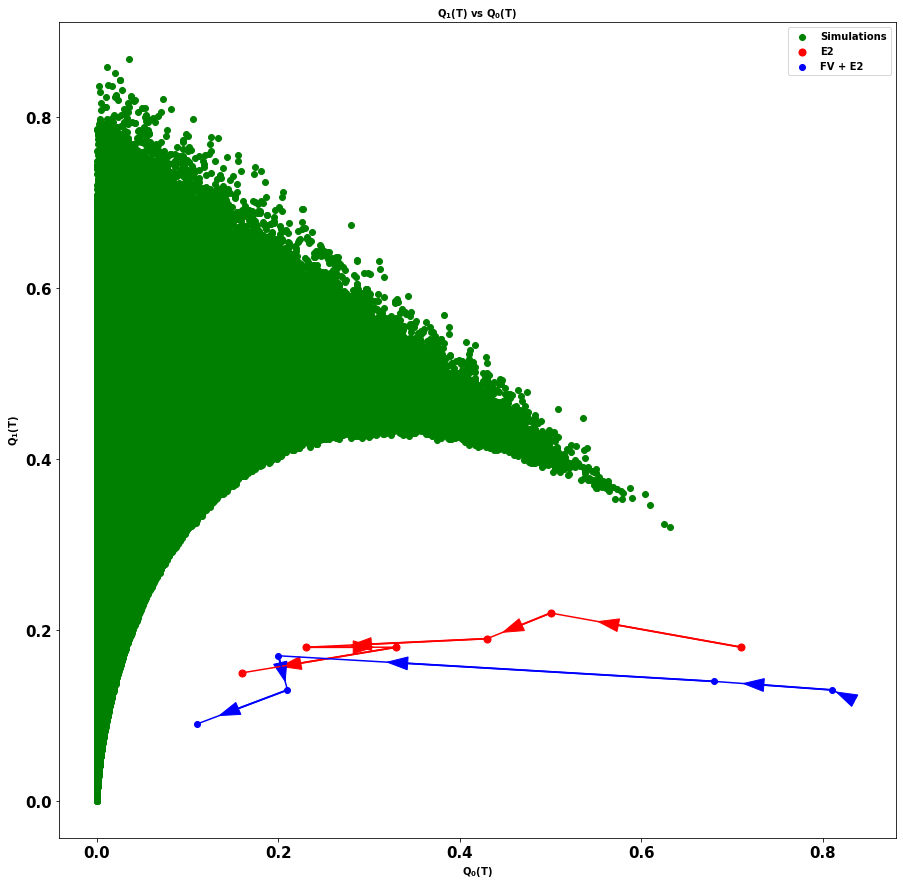

In [7]:
# Set the plot parameters for font weight, size, and figure size
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['figure.figsize'] = 15, 15
plt.rcParams.update({'font.size': 15})
# plt.rc('axes', labelsize=30) 

# Scatter plot for simulation of the independent model results
plt.scatter(ind[:,0],ind[:,1],color='green',label='Simulations') 
# Scatter plot for E2 data from March
plt.scatter(np.array(MAR.iloc[0][1:7]),np.array(MAR.iloc[1][1:7]),s=50,color='red',label='E2') 
# Draw arrows indicating direction of change for E2 data
for i in range(15,90,15):
    plt.arrow(MAR.iloc[0][i], MAR.iloc[1][i], 3*(MAR.iloc[0][i+15]-MAR.iloc[0][i])/4, 3*(MAR.iloc[1][i+15]-MAR.iloc[1][i])/4,\
          shape='full', lw=1,length_includes_head=True, head_width=.015, color='r')

# Line connecting E2 points
plt.plot(np.array(MAR.iloc[0][1:7]),np.array(MAR.iloc[1][1:7]),color='red') 
# Scatter plot for Flavopiridol + E2 data from December
plt.scatter(np.array(DEC.iloc[0][1:7]),np.array(DEC.iloc[1][1:7]),color='blue',label='FV + E2') 
# Line connecting Flavopiridol + E2 points
plt.plot(np.array(DEC.iloc[0][1:7]),np.array(DEC.iloc[1][1:7]),color='blue') 
# Draw arrows indicating direction of change for Flavopiridol + E2 data
for i in range(15,90,15):
    plt.arrow(DEC.iloc[0][i], DEC.iloc[1][i], 3*(DEC.iloc[0][i+15]-DEC.iloc[0][i])/4, 3*(DEC.iloc[1][i+15]-DEC.iloc[1][i])/4,\
          shape='full', lw=1,length_includes_head=True, head_width=.015, color='b')
# Set labels and title for the axes
plt.xlabel('$\mathbf{Q_{0}}$(T)',size=10) 
plt.ylabel('$\mathbf{Q_{1}}$(T)',size=10) 
plt.title("$\mathbf{Q_{1}}$(T) vs $\mathbf{Q_{0}}$(T)",size=10,fontweight="bold" )  
# Add legend to the plot
plt.legend(loc='upper right',prop={'size': 10})
# Save the figure as a PNG file with high resolution
plt.savefig('fig2-1.png', dpi=300)
# Display the plot
plt.show()

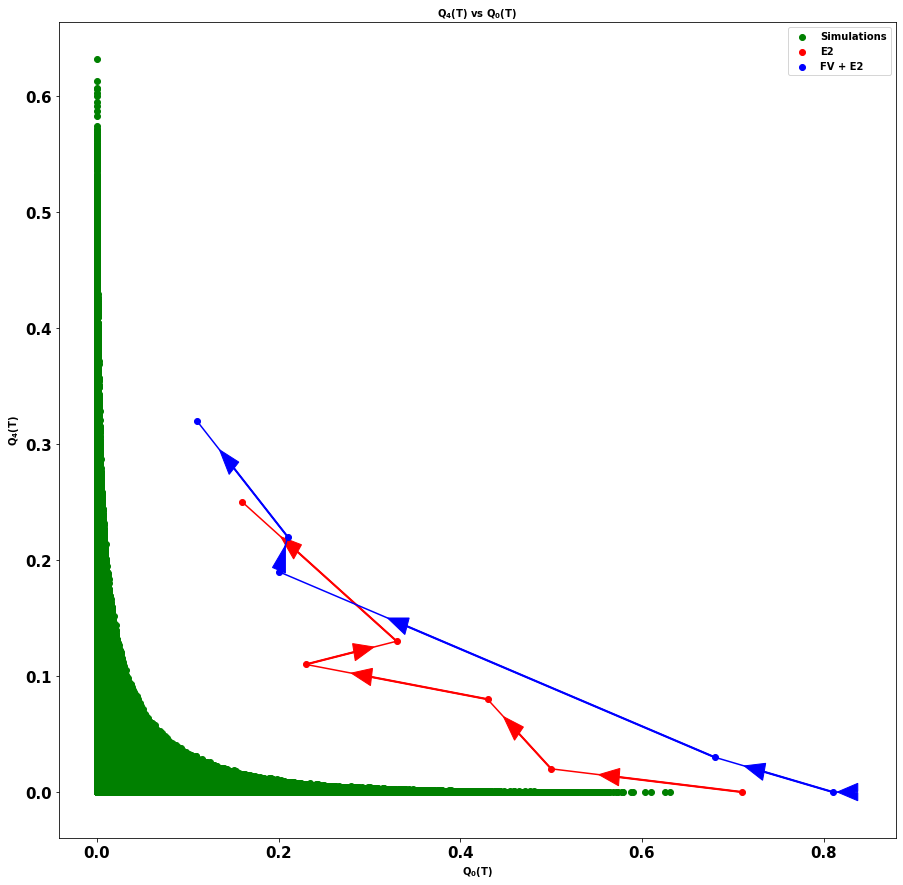

In [8]:
# Set the plot parameters for font weight, size, and figure size
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['figure.figsize'] = 15, 15
plt.rcParams.update({'font.size': 15})
# Scatter plot for simulation results (using the 0th and 4th columns)
plt.scatter(ind[:,0],ind[:,4],color='green',label='Simulations') 
# Scatter plot for E2 data from March (using the 0th and 4th rows)
plt.scatter(np.array(MAR.iloc[0][1:7]),np.array(MAR.iloc[4][1:7]),color='red',label='E2' )
# Line connecting E2 points
plt.plot(np.array(MAR.iloc[0][1:7]),np.array(MAR.iloc[4][1:7]),color='red')
# Draw arrows indicating direction of change for E2 data
for i in range(15,90,15):
    plt.arrow(MAR.iloc[0][i], MAR.iloc[4][i], 3*(MAR.iloc[0][i+15]-MAR.iloc[0][i])/4, 3*(MAR.iloc[4][i+15]-MAR.iloc[4][i])/4,\
          shape='full', lw=1,length_includes_head=True, head_width=.015, color='r')

# Scatter plot for Flavopiridol + E2 data from December (using the 0th and 4th rows)
plt.scatter(np.array(DEC.iloc[0][1:7]),np.array(DEC.iloc[4][1:7]),color='blue',label='FV + E2 ') 
# Line connecting Flavopiridol + E2 points
plt.plot(np.array(DEC.iloc[0][1:7]),np.array(DEC.iloc[4][1:7]),color='blue') 

# Draw arrows indicating direction of change for Flavopiridol + E2 data
for i in range(15,90,15):
    plt.arrow(DEC.iloc[0][i], DEC.iloc[4][i], 3*(DEC.iloc[0][i+15]-DEC.iloc[0][i])/4, 3*(DEC.iloc[4][i+15]-DEC.iloc[4][i])/4,\
          shape='full', lw=1,length_includes_head=True, head_width=.015, color='b')

# Set labels and title for the axes
plt.xlabel('$\mathbf{Q_{0}}$(T)',size=10) 
plt.ylabel('$\mathbf{Q_{4}}$(T)',size=10) 
plt.title("$\mathbf{Q_{4}}$(T) vs $\mathbf{Q_{0}}$(T)",size=10,fontweight="bold" )
# Add legend to the plot
plt.legend(loc='upper right',prop={'size': 10})
# Save the figure as a PNG file with high resolution
plt.savefig('fig2-2.png', dpi=300)
# Display the plot
plt.show()

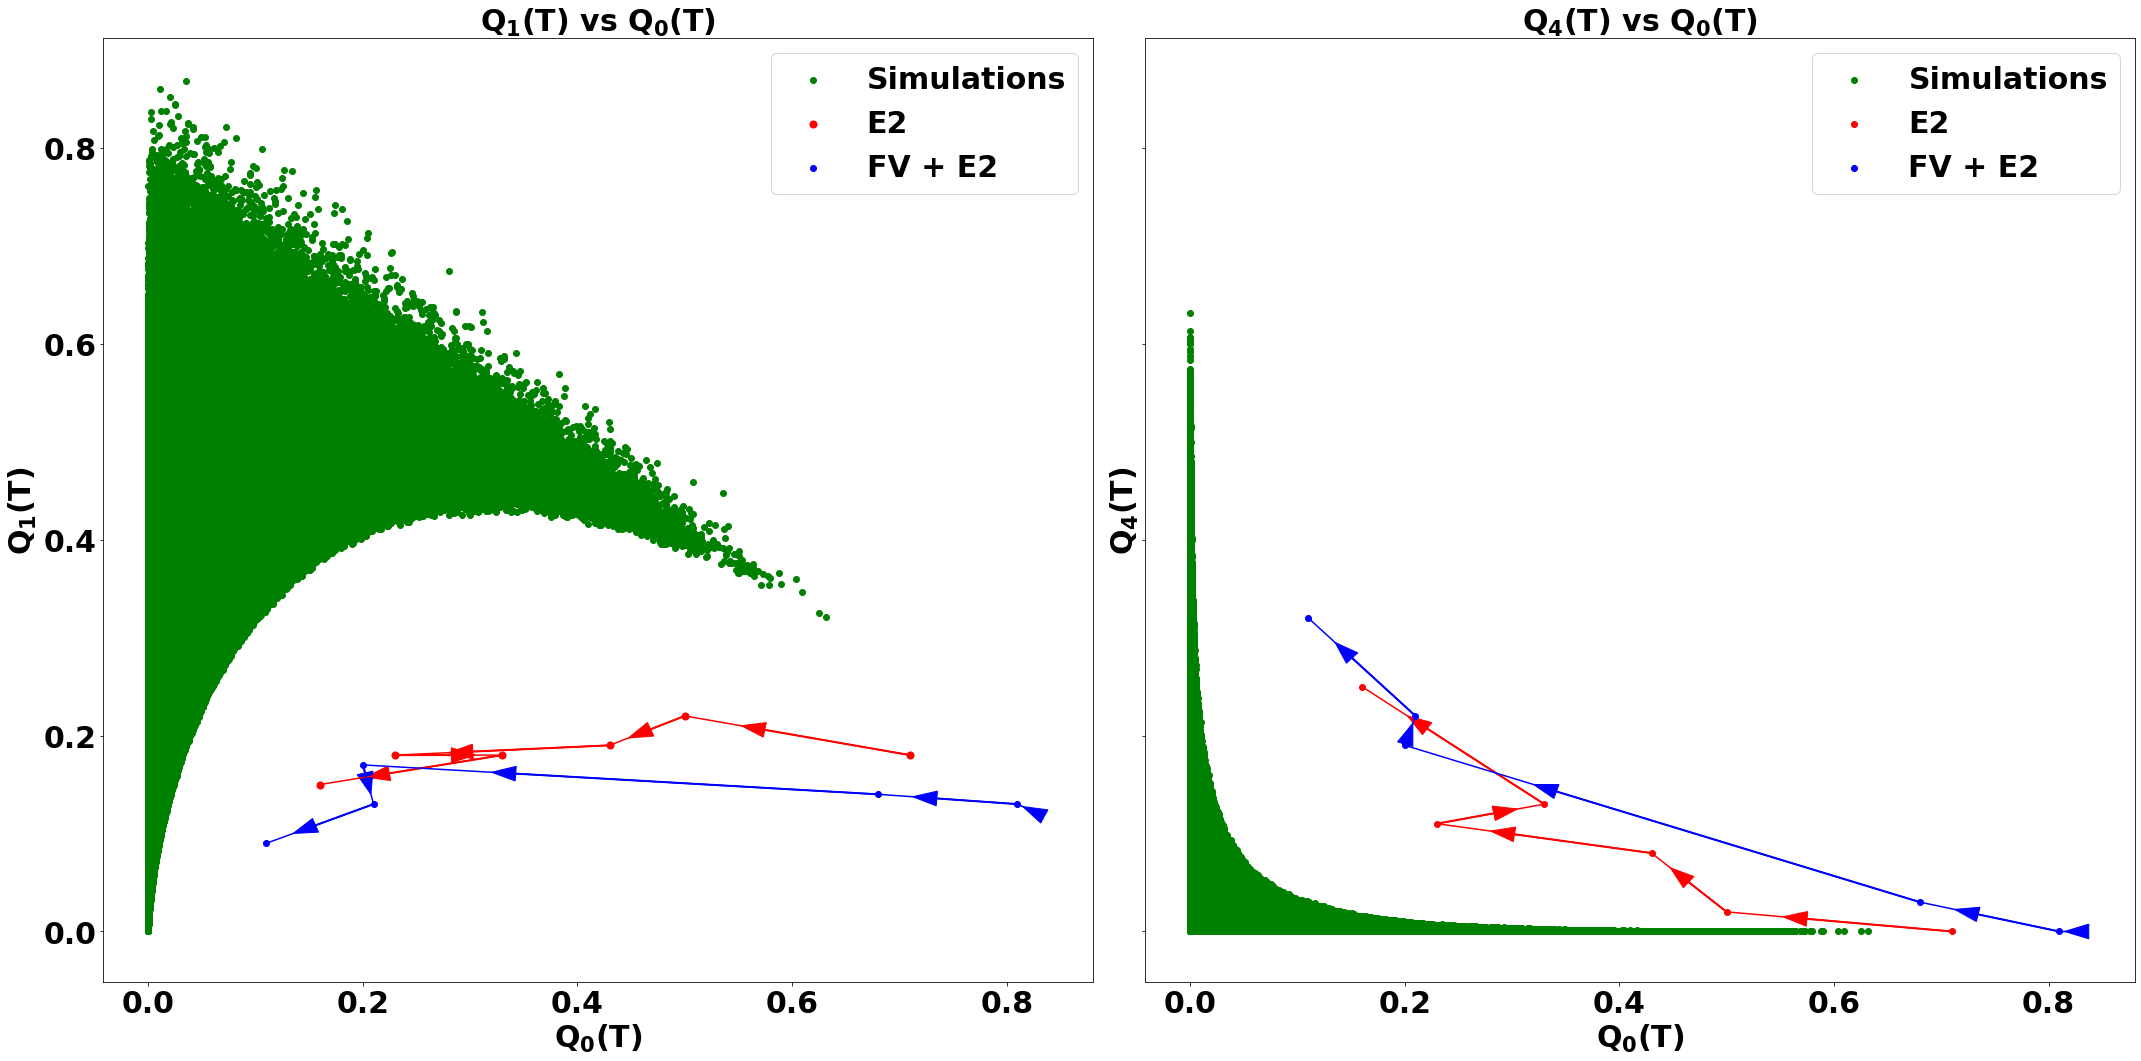

In [9]:
# Set the plot parameters for font and weight
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 15),constrained_layout=False,sharex=True, sharey=True)
# First subplot: Q1 vs Q0
axes[0].scatter(ind[:,0],ind[:,1],color='green',label='Simulations') 
axes[0].scatter(np.array(MAR.iloc[0][1:7]),np.array(MAR.iloc[1][1:7]),s=50,color='red',label='E2') 
# Draw arrows for E2 data indicating direction of change
for i in range(15,90,15):
    axes[0].arrow(MAR.iloc[0][i], MAR.iloc[1][i], 3*(MAR.iloc[0][i+15]-MAR.iloc[0][i])/4, 3*(MAR.iloc[1][i+15]-MAR.iloc[1][i])/4,\
          shape='full', lw=1,length_includes_head=True, head_width=.015, color='r')
axes[0].plot(np.array(MAR.iloc[0][1:7]),np.array(MAR.iloc[1][1:7]),color='red') 


# Scatter plot for Flavopiridol + E2 data
axes[0].scatter(np.array(DEC.iloc[0][1:7]),np.array(DEC.iloc[1][1:7]),color='blue',label='FV + E2') 
axes[0].plot(np.array(DEC.iloc[0][1:7]),np.array(DEC.iloc[1][1:7]),color='blue') 
# Draw arrows for FV + E2 data
for i in range(15,90,15):
    axes[0].arrow(DEC.iloc[0][i], DEC.iloc[1][i], 3*(DEC.iloc[0][i+15]-DEC.iloc[0][i])/4, 3*(DEC.iloc[1][i+15]-DEC.iloc[1][i])/4,\
          shape='full', lw=1,length_includes_head=True, head_width=.015, color='b')

# Set labels and title for the first subplot
axes[0].set_xlabel('$\mathbf{Q_{0}}$(T)',size=30) 
axes[0].set_ylabel('$\mathbf{Q_{1}}$(T)',size=30) 
axes[0].set_title("$\mathbf{Q_{1}}$(T) vs $\mathbf{Q_{0}}$(T)",size=30,fontweight="bold" )  
axes[0].legend(loc='upper right',prop={'size': 30})


# Second subplot: Q4 vs Q0
axes[1].scatter(ind[:,0],ind[:,4],color='green',label='Simulations') 
axes[1].scatter(np.array(MAR.iloc[0][1:7]),np.array(MAR.iloc[4][1:7]),color='red',label='E2' )
axes[1].plot(np.array(MAR.iloc[0][1:7]),np.array(MAR.iloc[4][1:7]),color='red')
# Draw arrows for E2 data indicating direction of change
for i in range(15,90,15):
    axes[1].arrow(MAR.iloc[0][i], MAR.iloc[4][i], 3*(MAR.iloc[0][i+15]-MAR.iloc[0][i])/4, 3*(MAR.iloc[4][i+15]-MAR.iloc[4][i])/4,\
          shape='full', lw=1,length_includes_head=True, head_width=.015, color='r')

# Scatter plot for Flavopiridol + E2 data
axes[1].scatter(np.array(DEC.iloc[0][1:7]),np.array(DEC.iloc[4][1:7]),color='blue',label='FV + E2 ') 
axes[1].plot(np.array(DEC.iloc[0][1:7]),np.array(DEC.iloc[4][1:7]),color='blue') 
# Draw arrows for FV + E2 data
for i in range(15,90,15):
    axes[1].arrow(DEC.iloc[0][i], DEC.iloc[4][i], 3*(DEC.iloc[0][i+15]-DEC.iloc[0][i])/4, 3*(DEC.iloc[4][i+15]-DEC.iloc[4][i])/4,\
          shape='full', lw=1,length_includes_head=True, head_width=.015, color='b')

# Set labels and title for the second subplot
axes[1].set_xlabel('$\mathbf{Q_{0}}$(T)',size=30) 
axes[1].set_ylabel('$\mathbf{Q_{4}}$(T)',size=30) 
axes[1].set_title("$\mathbf{Q_{4}}$(T) vs $\mathbf{Q_{0}}$(T)",size=30,fontweight="bold" )

# Add legends to both subplots
axes[1].legend(loc='upper right',prop={'size': 30})

# Set tick parameters for both axes
for i in range(2):
    axes[i].tick_params(axis = 'both', which = 'major', labelsize = 30)
    axes[i].tick_params(axis = 'both', which = 'major', labelsize = 30)

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()